# Starbucks Capstone Challenge

## Completed by Arya Suneesh

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

Here, we import necessary modules and reads in three JSON files using Pandas: portfolio.json, profile.json, and transcript.json.

Pandas is imported as pd, and NumPy is imported as np.
math module is imported but not used.
json module is also imported but not used.
%matplotlib inline is used to display plots inline in the notebook.
The read_json function from Pandas is used to read in each JSON file and store it as a DataFrame. The orient parameter is set to 'records', and lines parameter is set to True, which tells Pandas to treat each line in the file as a separate JSON object.

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Cleaning the data



In [2]:
def clean_portfolio(portfolio):
    """
    function is used to clean the portfolio dataset by creating dummy columns for the channels column and renaming the id column to offer_id.

    Input:

    portfolio: A pandas DataFrame containing the portfolio dataset.
    Output:

    portfolio_clean: A pandas DataFrame containing the cleaned portfolio dataset.
    """
    portfolio_clean = portfolio.copy()
    # Create dummy columns for the channels column
    d_chann = pd.get_dummies(portfolio_clean.channels.apply(pd.Series).stack(),
                             prefix="channel").sum(level=0)
    portfolio_clean = pd.concat([portfolio_clean, d_chann], axis=1, sort=False)
    portfolio_clean.drop(columns='channels', inplace=True)
    # Change column name
    portfolio_clean.rename(columns={'id':'offer_id'}, inplace=True)

    return portfolio_clean



In [3]:
portfolio_clean = clean_portfolio(portfolio)

In [4]:
portfolio_clean.head()

,difficulty,duration,offer_id,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1


In [5]:
def clean_profile(profile):
    """
    function takes a DataFrame of customer profiles as input and returns a cleaned version of the same DataFrame. The function performs the following cleaning steps:

    Transforms the became_member_on column from an integer to a datetime format.
    Creates a new valid column that identifies whether a customer's age is valid or not (invalid ages are denoted as 118 in the dataset).
    Renames the id column to customer_id.
    Creates dummy variables for the gender column.
    The cleaned DataFrame is returned as output.
    """
    profile_clean = profile.copy()
    # Transform date from int to datetime
    date = lambda x: pd.to_datetime(str(x), format='%Y%m%d')
    profile_clean.became_member_on = profile_clean.became_member_on.apply(date)
    # Create column that separates customers with valida data
    profile_clean['valid'] = (profile_clean.age != 118).astype(int)
    # Change the name of id column to customer_id
    profile_clean.rename(columns={'id':'customer_id'}, inplace=True)
    # Create dummy columns for the gender column
    dummy_gender = pd.get_dummies(profile_clean.gender, prefix="gender")
    profile_clean = pd.concat([profile_clean, dummy_gender], axis=1, sort=False)
    return profile_clean

In [6]:
profile_clean = clean_profile(profile)
profile_clean.head()

,age,became_member_on,gender,customer_id,income,valid,gender_F,gender_M,gender_O
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,0,0,0,0
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,1,1,0,0
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,0,0,0,0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1,1,0,0
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,0,0,0,0


In [7]:
def clean_transcript(transcript):
    
    """
    function that takes a transcript dataframe as input and returns a cleaned version of it.

    The function first splits the event column into several dummy columns, with each column representing a unique event. Then, it extracts the offer_id and amount data from the value column and creates new columns for them. Finally, the function changes the name of the person column to customer_id.

    Input:

    transcript: a pandas dataframe containing the transcript data
    Output:

    transcript_clean: a cleaned version of the input dataframe
    """
    transcript_clean = transcript.copy()
    # Split event into several dummy columns
    transcript_clean.event = transcript_clean.event.str.replace(' ', '_')
    dummy_event = pd.get_dummies(transcript_clean.event, prefix="event")
    transcript_clean = pd.concat([transcript_clean, dummy_event], axis=1,
                                 sort=False)
    transcript_clean.drop(columns='event', inplace=True)
    # Get the offer_id data from the value column
    transcript_clean['offer_id'] = [[*v.values()][0]
                                    if [*v.keys()][0] in ['offer id',
                                                          'offer_id'] else None
                                    for v in transcript_clean.value]
    # Get the transaction amount data from the value column
    transcript_clean['amount'] = [np.round([*v.values()][0], decimals=2)
                                  if [*v.keys()][0] == 'amount' else None
                                  for v in transcript_clean.value]
    transcript_clean.drop(columns='value', inplace=True)
    # Change the name of person column to customer_id
    transcript_clean.rename(columns={'person':'customer_id'}, inplace=True)
    return transcript_clean

In [8]:
transcript_clean = clean_transcript(transcript)
transcript_clean.head()

,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


The code below merges the transcript_clean, profile_clean, and portfolio_clean dataframes into one dataframe called df. Then, it changes the offer ids to a simplified form using a dictionary where each key is the original offer id and each value is a new simplified offer id. This simplification is done using the apply method of the offer_id dictionary. The new offer ids are stored in the offer_id column of the df dataframe.

In [9]:
trans_prof = pd.merge(transcript_clean, profile_clean, on='customer_id', how="left")
df = pd.merge(trans_prof, portfolio_clean, on='offer_id', how='left')
# Change the offer ids to a simplied form
offer_id = {'ae264e3637204a6fb9bb56bc8210ddfd': 'B1',
            '4d5c57ea9a6940dd891ad53e9dbe8da0': 'B2',
            '9b98b8c7a33c4b65b9aebfe6a799e6d9': 'B3',
            'f19421c1d4aa40978ebb69ca19b0e20d': 'B4',
            '0b1e1539f2cc45b7b9fa7c272da2e1d7': 'D1',
            '2298d6c36e964ae4a3e7e9706d1fb8c2': 'D2',
            'fafdcd668e3743c1bb461111dcafc2a4': 'D3',
            '2906b810c7d4411798c6938adc9daaa5': 'D4',
            '3f207df678b143eea3cee63160fa8bed': 'I1',
            '5a8bc65990b245e5a138643cd4eb9837': 'I2'}
df.offer_id = df.offer_id.apply(lambda x: offer_id[x] if x else None)


In [10]:
df.head()

,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,offer_id,amount,age,became_member_on,...,gender_M,gender_O,difficulty,duration,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,B3,NaN,75,2017-05-09,...,0,0,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,D1,NaN,118,2017-08-04,...,0,0,20.0,10.0,discount,5.0,1.0,0.0,0.0,1.0
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,D4,NaN,68,2018-04-26,...,1,0,10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,D3,NaN,118,2017-09-25,...,0,0,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,B2,NaN,118,2017-10-02,...,0,0,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0


In [11]:
len(df)

306534

# Analysis of Data

The below code merges the transcript_clean, profile_clean, and portfolio_clean dataframes into one dataframe called df. Then, it changes the offer ids to a simplified form using a dictionary where each key is the original offer id and each value is a new simplified offer id. This simplification is done using the apply method of the offer_id dictionary. The new offer ids are stored in the offer_id column of the df dataframe.

Text(0.5,1,'Number of Offers by Offer Type')

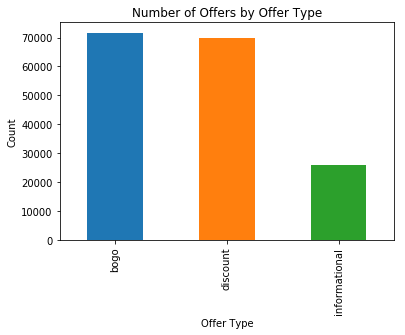

In [12]:
import matplotlib.pyplot as plt

# Plot graph on offer type
df.groupby('offer_type')['customer_id'].count().plot(kind='bar')
plt.xlabel('Offer Type')
plt.ylabel('Count')
plt.title('Number of Offers by Offer Type')


Text(0.5,1,'Number of Offers by Offer ID')

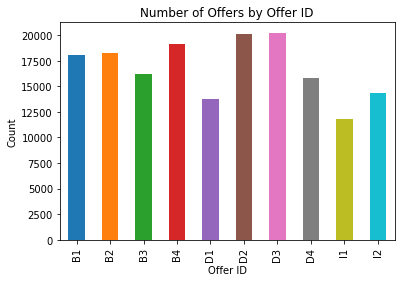

In [13]:
# Plot graph on offer id
df.groupby('offer_id')['customer_id'].count().plot(kind='bar')
plt.xlabel('Offer ID')
plt.ylabel('Count')
plt.title('Number of Offers by Offer ID')

In [24]:
def get_offer_cust(df, offer_type=None):
    """
    Get offer data for customers, optionally filtered by offer type.

    Input:
        df (pandas.DataFrame): The dataframe containing offer data.
        offer_type (str, optional): The type of offer to filter on (e.g. 'bogo', 'discount', 'informational').

    Output:
        dict: A dictionary of offer data for customers, with keys for 'received', 'viewed', 'completed', and 'reward' (if applicable).
    """
    data = dict()
    for e in ['received', 'viewed', 'completed']:
        # Informational offers don't have completed data
        if offer_type == 'informational' and e == 'completed':
            continue
        flag = (df['event_offer_{}'.format(e)] == 1)
        key = e
        if offer_type:
            flag = flag & (df.offer_type == offer_type)
            key = '{}_'.format(offer_type) + key
        data[key] = df[flag].groupby('customer_id').offer_id.count()
    # Informational offers don't have reward data
    flag = (df.event_offer_completed == 1)
    if offer_type != 'informational':
        key = 'reward'
        if offer_type:
            flag = flag & (df.offer_type == offer_type)
            key = '{}_'.format(offer_type) + key
        data[key] = df[flag].groupby('customer_id').reward.sum()

    return data


def get_offer_id_cust(df, offer_id):
    """
    Get offer data for customers who received a specific offer.

    Input:
        df (pandas.DataFrame): The dataframe containing offer data.
        offer_id (str): The ID of the offer to filter on (e.g. 'B1', 'D4', 'I2').

    Output:
        dict: A dictionary of offer data for customers who received the specified offer, with keys for 'B1_received', 'B1_viewed', 'B1_completed', 'B1_reward', etc.
    """
    data = dict()

    for e in ['received', 'viewed', 'completed']:
        # Informational offers don't have completed data
        if offer_id in ['I1', 'I2'] and e == 'completed':
            continue
        event = 'event_offer_{}'.format(e)
        flag = (df[event] == 1) & (df.offer_id == offer_id)
        key = '{}_{}'.format(offer_id, e)
        data[key] = df[flag].groupby('customer_id').offer_id.count()

    # Informational offers don't have reward data
    flag = (df.event_offer_completed == 1) & (df.offer_id == offer_id)
    if offer_id not in ['I1', 'I2']:
        key = '{}_reward'.format(offer_id)
        data[key] = df[flag].groupby('customer_id').reward.sum()

    return data

def round_age(x):
    """
    Round age to the 5th of each 10th (15, 25,..., 105)
    Input:
    - x: age
    Output:
    - rounded age. Returns 0 if the value is less than 15 or more than 105
    """
    for y in range(15, 106, 10):
        if x >= y and x < y+10:
            return y
    return 0


def round_income(x):
    """
    Round income to the lower 10000th
    Intput:
    - income
    Output:
    - lower 10000th of the income. Return 0 if the income
    is less than 30,000 or more than 120,000
    """
    for y in range(30, 130, 10):
        if x >= y*1000 and x < (y+10)*1000:
            return y*1000
    return 0



A dictionary called cust_dict is created to store various customer data. It first gets total transaction data, including the sum of all customer expenses and the number of transactions they made, and stores it in the dictionary. It then calls the get_offer_cust function to get aggregate offer data and stores the resulting dictionary in cust_dict.

Next, it loops over the three offer types ('bogo', 'discount', 'informational') and calls get_offer_cust for each offer type, adding the resulting dictionary to cust_dict.

Finally, the code loops over the 10 offer IDs ('B1', 'B2', 'B3', 'B4', 'D1', 'D2', 'D3', 'D4', 'I1', 'I2') and calls get_offer_id_cust for each offer ID, adding the resulting dictionary to cust_dict.

The resulting cust_dict is then concatenated into a DataFrame called customers, which contains various customer data such as total expense, offer data, age, and income. The round_age and round_income functions are used to group age and income data into bins. The net_expense column is also added, which represents the difference between the total expense and the total reward received by each customer.

In [25]:
cust_dict = dict()
# Get total transaction data
transactions = df[df.event_transaction == 1].groupby('customer_id')
cust_dict['total_expense'] = transactions.amount.sum()
cust_dict['total_transactions'] = transactions.amount.count()
# Get aggregate offer data
cust_dict.update(get_offer_cust(df))
# Get offer type data
for offer_type in ['bogo', 'discount', 'informational']:
    cust_dict.update(get_offer_cust(df, offer_type))
# Get offer id data
for offer_id in ['B1', 'B2', 'B3', 'B4', 'D1', 'D2', 'D3', 'D4', 'I1', 'I2']:
    cust_dict.update(get_offer_id_cust(df, offer_id))

customers = pd.concat(cust_dict.values(), axis=1, sort=False)
customers.columns = cust_dict.keys()
customers.fillna(0, inplace=True)
customers = pd.merge(customers, profile_clean.set_index('customer_id'), left_index=True, right_index=True)
customers['age_group'] = customers.age.apply(round_age)
customers['income_group'] = customers.income.apply(round_income)
customers['net_expense'] = customers['total_expense'] - customers['reward']


In [26]:
customers.head()

,total_expense,total_transactions,received,viewed,completed,reward,bogo_received,bogo_viewed,bogo_completed,bogo_reward,...,became_member_on,gender,income,valid,gender_F,gender_M,gender_O,age_group,income_group,net_expense
0009655768c64bdeb2e877511632db8f,127.60,8.0,5.0,4.0,3.0,9.0,1.0,1.0,1.0,5.0,...,2017-04-21,M,72000.0,1,0,1,0,25,70000,118.60
00116118485d4dfda04fdbaba9a87b5c,4.09,3.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,...,2018-04-25,None,NaN,0,0,0,0,0,0,4.09
0011e0d4e6b944f998e987f904e8c1e5,79.46,5.0,5.0,5.0,3.0,13.0,1.0,1.0,1.0,5.0,...,2018-01-09,O,57000.0,1,0,0,1,35,50000,66.46
0020c2b971eb4e9188eac86d93036a77,196.86,8.0,5.0,3.0,3.0,14.0,2.0,1.0,1.0,10.0,...,2016-03-04,F,90000.0,1,1,0,0,55,90000,182.86
0020ccbbb6d84e358d3414a3ff76cffd,154.05,12.0,4.0,4.0,3.0,13.0,2.0,2.0,2.0,10.0,...,2016-11-11,F,60000.0,1,1,0,0,15,60000,141.05


In [27]:
avg_transaction = customers[customers.valid == 1].total_expense / customers[customers.valid == 1].total_transactions

In [29]:
total_expense = customers[customers.valid == 1].total_expense

A histogram plot is generated that compares the distribution of average transaction amounts and total expenses for customers with valid profiles.

avg_transaction is calculated by dividing the total_expense by the total_transactions for customers with valid profiles. Any missing values are replaced with 0.
The first subplot displays the distribution of avg_transaction in bins of 400. The x-axis represents the average transaction amount, and the y-axis represents the frequency of the amount in the given bin.
The second subplot displays the distribution of total_expense in bins of 100. The x-axis represents the total expense, and the y-axis represents the frequency of the amount in the given bin.

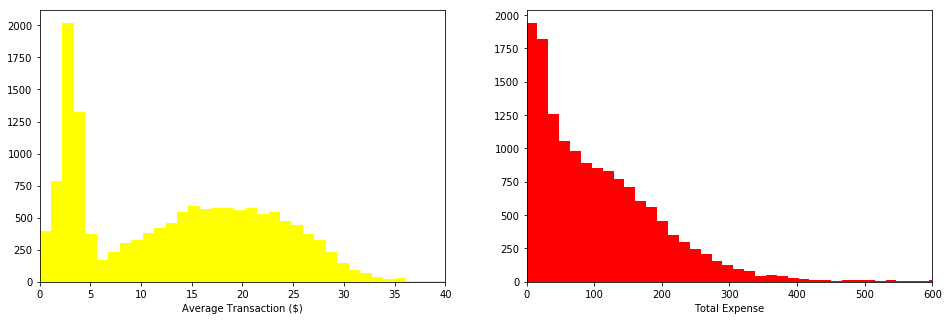

In [36]:
plt.figure(figsize=(16,5))

bins = 400

avg_transaction = customers[customers.valid == 1].total_expense / customers[customers.valid == 1].total_transactions
avg_transaction.fillna(0, inplace=True)
plt.subplot(121)
plt.hist(avg_transaction, bins,color = "yellow")
plt.xlabel('Average Transaction ($)')
ax = plt.gca();
ax.set_xlim(0,40);

bins = 100
plt.subplot(122)
plt.hist(customers[customers.valid == 1].total_expense, bins, color = "red");
plt.xlabel('Total Expense')
ax = plt.gca();
ax.set_xlim(0,600);

This code block contains several visualizations of customer demographics and transaction data.

In the first figure, there are three subplots. The first subplot shows the number of customers by gender using a bar chart. The second subplot displays a histogram of customer income grouped into 20 bins. The third subplot displays a histogram of customer age grouped into 20 bins. All three subplots have gridlines to aid in reading the data.

In the second figure, there is one subplot that shows a line chart of the average transaction value by age group. The x-axis shows the age group (in 10-year increments) and the y-axis shows the dollar amount. The line chart has blue color and gridlines. The chart is titled "Average Transaction Value," and there is a label on the x-axis for "Age" and on the y-axis for "$".

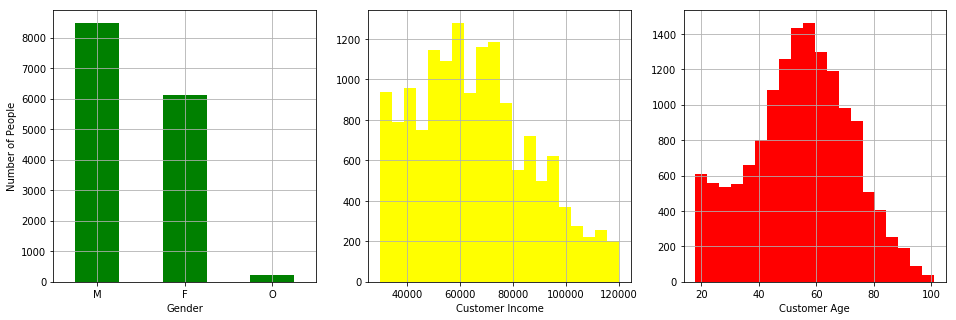

In [39]:
plt.figure(figsize=(16,5))

plt.subplot(131)
customers.gender.value_counts().reindex(['M', 'F', 'O']).plot(kind='bar', rot=0, figsize=(16,5), color='green');
plt.ylabel('Number of People');
plt.xlabel('Gender');
plt.grid();

plt.subplot(132)
cust_income = customers[customers.income_group > 0].income
plt.xlabel('Customer Income');
plt.hist(cust_income, 20, color='yellow')
plt.grid()

plt.subplot(133)
cust_age = customers[customers.valid == 1].age
plt.xlabel('Customer Age');
plt.hist(cust_age, 20, color='red')
plt.grid(True)

Text(0,0.5,'$')

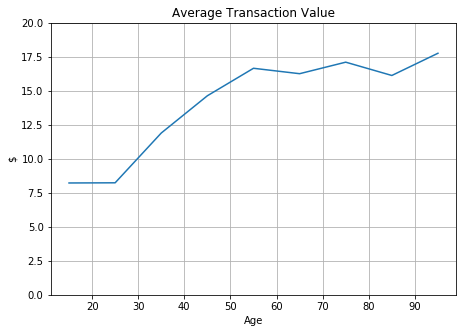

In [41]:
plt.figure(figsize=(16,5))


plt.subplot(121)
age_groupby = customers[(customers.valid == 1) & (customers.income_group > 0)].groupby('age_group')
age_transacts = age_groupby.total_transactions.sum()
age_expense = age_groupby.total_expense.sum()
ax = (age_expense / age_transacts).reindex(range(15, 96,10)).plot(kind='line', rot=0, color='tab:blue');
plt.title('Average Transaction Value');
ax.set_ylim(0, 20)
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('$')

In [44]:
def get_offer_stat(customers, stat, offer):
    valid = (customers.valid == 1)
    rcv_col = '{}_received'.format(offer)
    vwd_col = '{}_viewed'.format(offer)
    received = valid & (customers[rcv_col] > 0) & (customers[vwd_col] == 0)
    cpd = None
    if offer not in ['informational', 'I1', 'I2']:
        cpd_col = '{}_completed'.format(offer)
        viewed = valid & (customers[vwd_col] > 0) & (customers[cpd_col] == 0)
        completed = valid & (customers[vwd_col] > 0) & (customers[cpd_col] > 0)
        cpd = customers[completed][stat]
    else:
        viewed = valid & (customers[vwd_col] > 0)

    return customers[received][stat], customers[viewed][stat], cpd


def get_average_expense(customers, offer):
    rcv_total, vwd_total, cpd_total = get_offer_stat(customers,
                                                     'total_expense', offer)
    rcv_trans, vwd_trans, cpd_trans = get_offer_stat(customers,
                                                     'total_transactions',
                                                     offer)

    rcv_avg = rcv_total / rcv_trans
    rcv_avg.fillna(0, inplace=True)
    vwd_avg = vwd_total / vwd_trans
    vwd_avg.fillna(0, inplace=True)

    cpd_avg = None
    if offer not in ['informational', 'I1', 'I2']:
        cpd_avg = cpd_total / cpd_trans

    return rcv_avg, vwd_avg, cpd_avg


def get_average_reward(customers, offer):
    cpd_col = '{}_completed'.format(offer)
    rwd_col = '{}_reward'.format(offer)
    completed = customers[(customers.valid == 1) & (customers[cpd_col] > 0)]

    return completed[rwd_col] / completed[cpd_col]


def get_offer_stat_by(customers, stat, offer, by_col, aggr='sum'):

    valid = (customers.valid == 1)
    rcv_col = '{}_received'.format(offer)
    vwd_col = '{}_viewed'.format(offer)
    received = valid & (customers[rcv_col] > 0) & (customers[vwd_col] == 0)
    cpd = None
    if offer not in ['informational', 'I1', 'I2']:
        cpd_col = '{}_completed'.format(offer)
        viewed = valid & (customers[vwd_col] > 0) & (customers[cpd_col] == 0)
        completed = valid & (customers[cpd_col] > 0)
        if aggr == 'sum':
            cpd = customers[completed].groupby(by_col)[stat].sum()
        elif aggr == 'mean':
            cpd = customers[completed].groupby(by_col)[stat].mean()
    else:
        viewed = valid & (customers[vwd_col] > 0)
    if aggr == 'sum':
        rcv = customers[received].groupby(by_col)[stat].sum()
        vwd = customers[viewed].groupby(by_col)[stat].sum()
    elif aggr == 'mean':
        rcv = customers[received].groupby(by_col)[stat].mean()
        vwd = customers[viewed].groupby(by_col)[stat].mean()

    return rcv, vwd, cpd


def get_average_expense_by(customers, offer, by_col):
    rcv_total, vwd_total, cpd_total = get_offer_stat_by(customers, 'total_expense', offer, by_col)
    rcv_trans, vwd_trans, cpd_trans = get_offer_stat_by(customers, 'total_transactions', offer, by_col)

    rcv_avg = rcv_total / rcv_trans
    rcv_avg.fillna(0, inplace=True)
    vwd_avg = vwd_total / vwd_trans
    vwd_avg.fillna(0, inplace=True)

    cpd_avg = None
    if offer not in ['informational', 'I1', 'I2']:
        cpd_avg = cpd_total / cpd_trans

    return rcv_avg, vwd_avg, cpd_avg


def get_average_reward_by(customers, offer, by_col):
    cpd_col = '{}_completed'.format(offer)
    rwd_col = '{}_reward'.format(offer)
    completed = customers[(customers.valid == 1) & (customers[cpd_col] > 0)].groupby(by_col)

    return completed[rwd_col].sum() / completed[cpd_col].count()


The function plot_offer_expense takes in two arguments:

customers: A Pandas DataFrame that contains customer transaction and offer data
offer: A string that specifies the type of offer to analyze ('bogo', 'discount', 'informational', or a specific offer ID such as 'B1', 'D2', etc.)
The function generates a 2x1 grid of histograms to visualize the transaction data for the specified offer type. The first plot shows the total transaction amount for customers who received, viewed, and completed the offer. The second plot shows the average transaction amount for customers who received, viewed, and completed the offer.

The histograms are plotted using Matplotlib, with 100 bins for the total transaction plot and 50 bins for the average transaction plot. The histograms for the different groups (received, viewed, completed) are plotted with different colors and an alpha value of 0.5. The x-axis limits for the two plots are set to 0 and 600 for the total transaction plot and 0 and 50 for the average transaction plot.

Note that for 'informational' offers and specific offer IDs ('I1', 'I2', 'B1', 'D1', etc.), the "completed" group is not applicable, so it is not plotted.

In [45]:
def plot_offer_expense(customers, offer):
    rcv, vwd, cpd = get_offer_stat(customers, 'total_expense', offer)
    rcv_avg, vwd_avg, cpd_avg = get_average_expense(customers, offer)

    plt.figure(figsize=(16, 5))
    bins = 100

    plt.subplot(121)
    plt.hist(rcv, bins, alpha=0.5, label='{}-received'.format(offer))
    plt.hist(vwd, bins, alpha=0.5, label='{}-viewed'.format(offer))
    if offer not in ['informational', 'I1', 'I2']:
        plt.hist(cpd, bins, alpha=0.5, label='{}-completed'.format(offer))
    plt.legend(loc='best')
    ax = plt.gca();
    ax.set_xlim(0, 600);
    plt.title('Total Transaction ($)')
    plt.grid();

    plt.subplot(122)
    plt.hist(rcv_avg, bins, alpha=0.5, label='{}-received'.format(offer))
    plt.hist(vwd_avg, bins, alpha=0.5, label='{}-viewed'.format(offer))
    if offer not in ['informational', 'I1', 'I2']:
        plt.hist(cpd_avg, bins, alpha=0.5, label='{}-completed'.format(offer))
    plt.legend(loc='best')
    ax = plt.gca();
    ax.set_xlim(0, 50);
    plt.title('Average Transaction ($)')
    plt.grid();



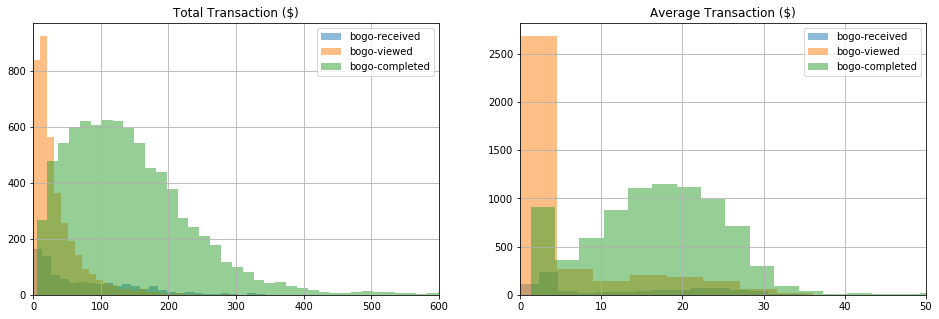

In [46]:
plot_offer_expense(customers, 'bogo')

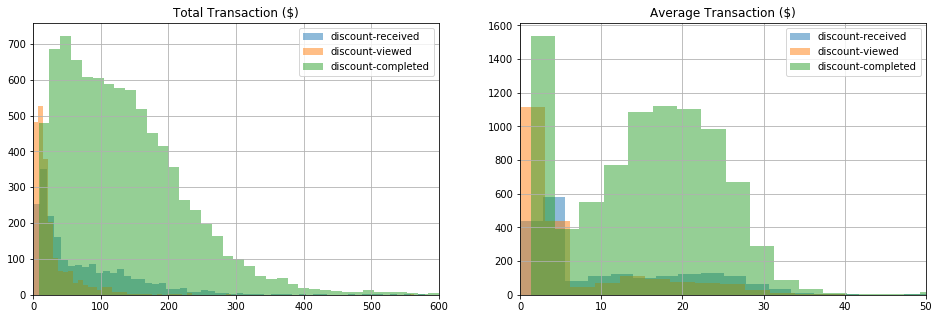

In [47]:
plot_offer_expense(customers, 'discount')

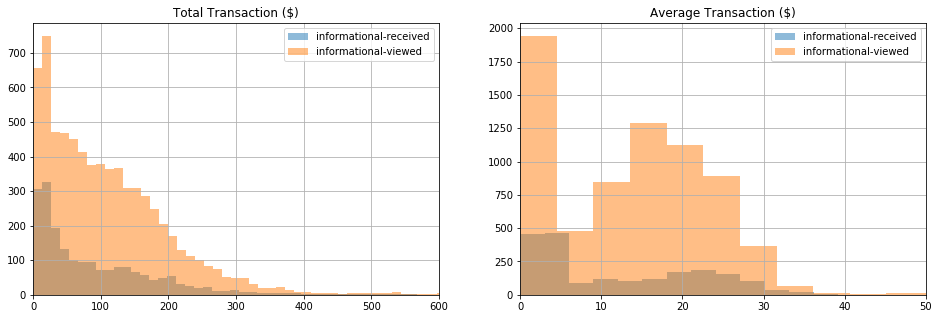

In [48]:
plot_offer_expense(customers, 'informational')

The 'plot_offer_expense_by' function that creates a six-panel plot of different statistics related to customer behavior for a given offer. The function takes in two arguments: a Pandas DataFrame customers containing customer data and a string offer containing the name of the offer to analyze.

The function first creates six empty dictionaries to store statistics for each of three customer demographics (age_group, income_group, and gender) and for three different metrics (net_expense, received, and viewed). The get_offer_stat_by function is then used to calculate the relevant statistics for each demographic and metric, storing the results in the dictionaries. The get_average_expense_by function is also used to calculate the average transaction value for each demographic.

The six subplots of the resulting plot each show different combinations of these statistics for each demographic and metric. The first two subplots show line plots of net expense (the sum of all transactions) for each demographic and metric, with separate lines for customers who received the offer and those who viewed it. For offers that can be completed, a third line is shown for customers who completed the offer.

The third subplot shows a stacked bar chart of net expense for each gender, with separate bars for customers who received, viewed, and completed the offer.

The next three subplots show the same statistics as the first two, but for average transaction value instead of net expense.

The final subplot shows a stacked bar chart of average transaction value for each gender.

In [50]:
def plot_offer_expense_by(customers, offer):
    rcv_by = dict()
    vwd_by = dict()
    cpd_by = dict()
    rcv_avg_by = dict()
    vwd_avg_by = dict()
    cpd_avg_by = dict()

    for key in ['age_group', 'income_group', 'gender']:
        rcv_by[key], vwd_by[key], cpd_by[key] = get_offer_stat_by(customers,
                                                                  'net_expense',
                                                                  offer, key,
                                                                  aggr='mean')
        by_data = get_average_expense_by(customers, offer, key)
        rcv_avg_by[key], vwd_avg_by[key], cpd_avg_by[key] = by_data

    plt.figure(figsize=(16, 10))

    plt.subplot(231)
    plt.plot(rcv_by['age_group'], label='{}-received'.format(offer))
    plt.plot(vwd_by['age_group'], label='{}-viewed'.format(offer))
    if offer not in ['informational', 'I1', 'I2']:
        plt.plot(cpd_by['age_group'], label='{}-completed'.format(offer))
    plt.legend(loc='best')
    plt.title('Net Expense');
    plt.grid();

    plt.subplot(232)
    plt.plot(rcv_by['income_group'], label='{}-received'.format(offer))
    plt.plot(vwd_by['income_group'], label='{}-viewed'.format(offer))
    if offer not in ['informational', 'I1', 'I2']:
        plt.plot(cpd_by['income_group'], label='{}-completed'.format(offer))
    plt.legend(loc='best')
    plt.title('Net Expense');
    plt.grid();

    index = np.array([0, 1, 2])
    bar_width = 0.3
    plt.subplot(233)
    plt.bar(index, rcv_by['gender'].reindex(['M', 'F', 'O']),
            bar_width, label='{}-received'.format(offer))
    plt.bar(index + bar_width, vwd_by['gender'].reindex(['M', 'F', 'O']),
            bar_width, label='{}-viewed'.format(offer))
    if offer not in ['informational', 'I1', 'I2']:
        plt.bar(index + 2*bar_width, cpd_by['gender'].reindex(['M', 'F', 'O']),
                bar_width, label='{}-completed'.format(offer))
    plt.grid();
    plt.legend(loc='best');
    plt.title('Net Expense');
    plt.xticks(index + bar_width, ('M', 'F', 'O'));

    plt.subplot(234)
    plt.plot(rcv_avg_by['age_group'], label='{}-received'.format(offer))
    plt.plot(vwd_avg_by['age_group'], label='{}-viewed'.format(offer))
    if offer not in ['informational', 'I1', 'I2']:
        plt.plot(cpd_avg_by['age_group'], label='{}-completed'.format(offer))
    plt.legend(loc='best')
    plt.title('Average Transaction Value');
    plt.grid();

    plt.subplot(235)
    plt.plot(rcv_avg_by['income_group'], label='{}-received'.format(offer))
    plt.plot(vwd_avg_by['income_group'], label='{}-viewed'.format(offer))
    if offer not in ['informational', 'I1', 'I2']:
        plt.plot(cpd_avg_by['income_group'], label='{}-completed'.format(offer))
    plt.legend(loc='best')
    plt.title('Average Transaction Value');
    plt.grid();

    plt.subplot(236)
    plt.bar(index, rcv_avg_by['gender'].reindex(['M', 'F', 'O']), bar_width,
            label='{}-received'.format(offer))
    plt.bar(index + bar_width, vwd_avg_by['gender'].reindex(['M', 'F', 'O']),
            bar_width, label='{}-viewed'.format(offer))
    if offer not in ['informational', 'I1', 'I2']:
        plt.bar(index+2*bar_width, cpd_avg_by['gender'].reindex(['M', 'F', 'O']),
                bar_width, label='{}-completed'.format(offer))
    plt.grid();
    plt.legend(loc='best');
    plt.title('Average Transaction Value');
    plt.xticks(index + bar_width, ('M', 'F', 'O'));

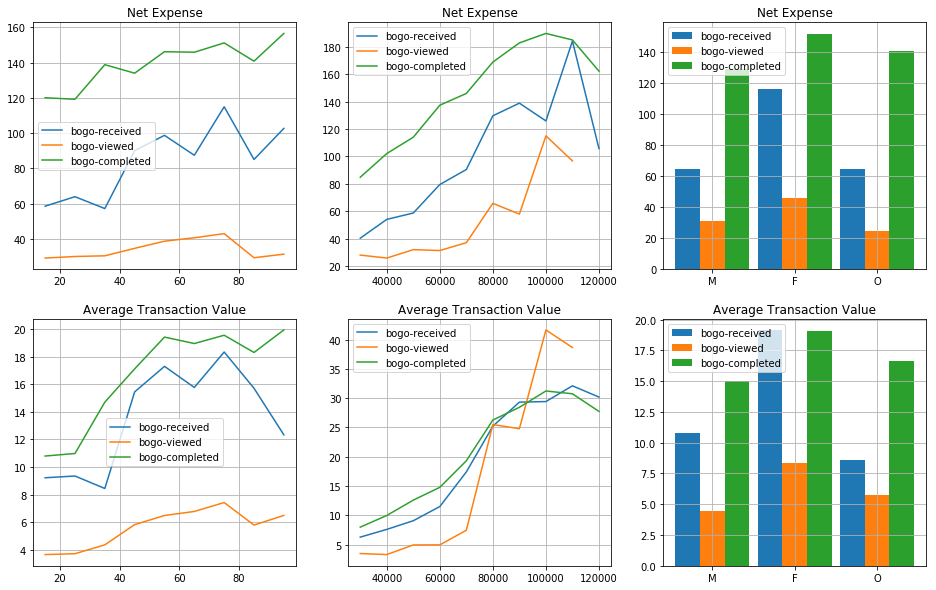

In [51]:
plot_offer_expense_by(customers, 'bogo')

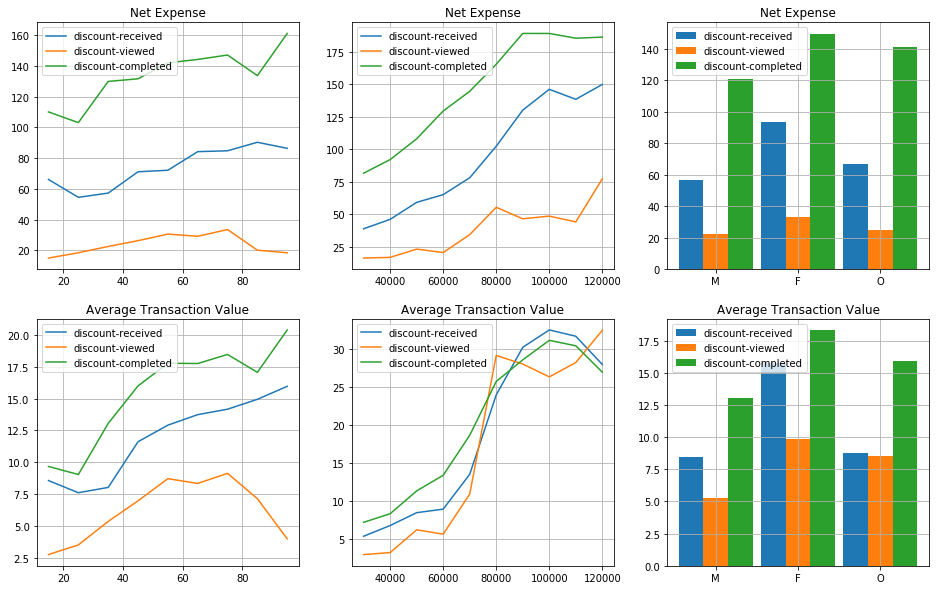

In [52]:
plot_offer_expense_by(customers, 'discount')

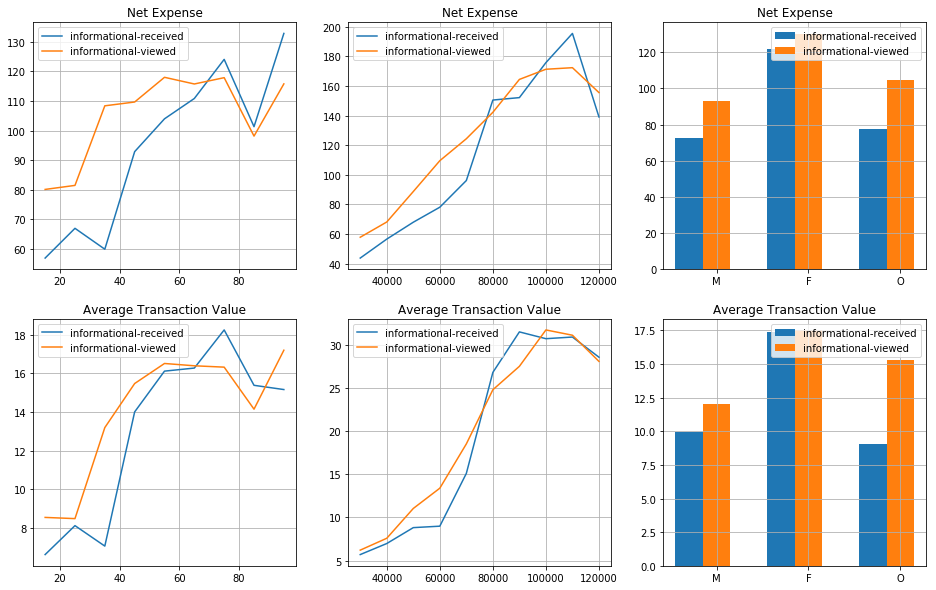

In [53]:
plot_offer_expense_by(customers, 'informational')

In [49]:
customers.corr().style.background_gradient(cmap='coolwarm')

/opt/conda/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


# Recommendation System 

Here, we define functions to create a recommendation system for popular offers based on customer purchase behavior, without using demographic data such as age, income, or gender.

The get_net_expense function calculates the net expense of customers who have viewed and completed a specific offer, and have made at least 5 transactions. The get_most_popular_offers function uses this to sort a list of offers by net expense and returns the top n offers along with their net expense.

The get_most_popular_offers_filtered function filters the customer data by specified demographics if provided, and then calls the get_most_popular_offers function to return the top n offers based on the filtered data.

The code also includes calls to plot the net expense of specific offers, such as B2, B1, and D1.

In [58]:
def get_net_expense(customers, offer, q=0.5):
    flag = (customers['{}_viewed'.format(offer)] > 0)
    flag = flag & (customers.net_expense > 0)
    flag = flag & (customers.total_transactions >= 5)
    if offer not in ['I1', 'I2']:
        flag = flag & (customers['{}_completed'.format(offer)] > 0)
    return customers[flag].net_expense.quantile(q)

def get_most_popular_offers(customers, n_top=2, q=0.5, offers=None):
    if not offers:
        offers = ['I1', 'I2', 'B1', 'B2', 'B3',
                  'B4', 'D1', 'D2', 'D3', 'D4']
    offers.sort(key=lambda x: get_net_expense(customers, x, q), reverse=True)
    offers_dict = {o: get_net_expense(customers, o, q) for o in offers}
    return offers[:n_top], offers_dict


In [60]:
offers = get_most_popular_offers(customers, n_top=10)
print("Order of most popular orders: ", offers[0])
print("Net expense for each offer", offers[1])

Order of most popular orders:  ['B2', 'B1', 'D1', 'D4', 'B3', 'B4', 'D3', 'D2', 'I1', 'I2']
Net expense for each offer {'B2': 144.72500000000002, 'B1': 144.505, 'D1': 144.40000000000003, 'D4': 133.92000000000002, 'B3': 127.47999999999999, 'B4': 126.145, 'D3': 125.105, 'D2': 117.8, 'I1': 109.76999999999998, 'I2': 88.41}


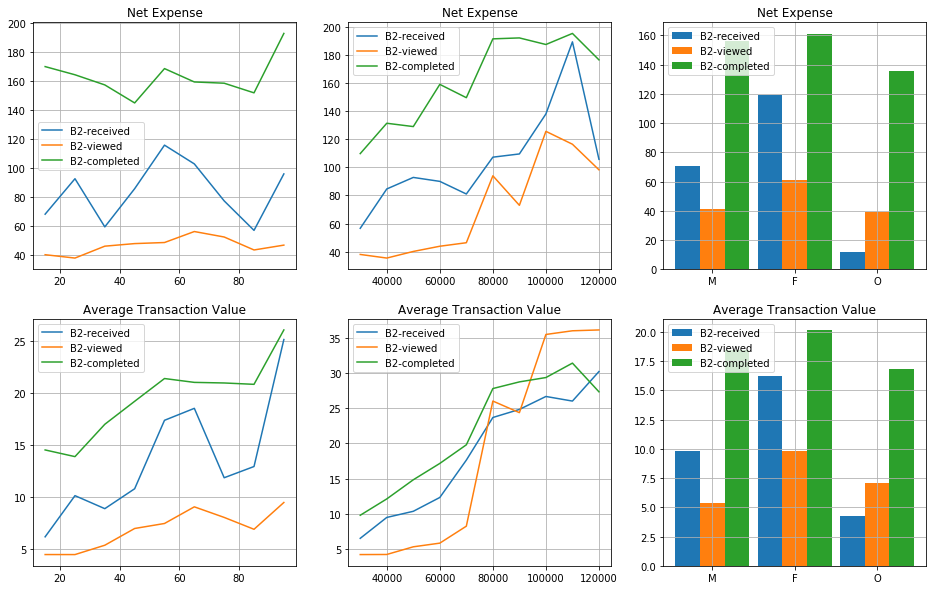

In [61]:
plot_offer_expense_by(customers, 'B2')

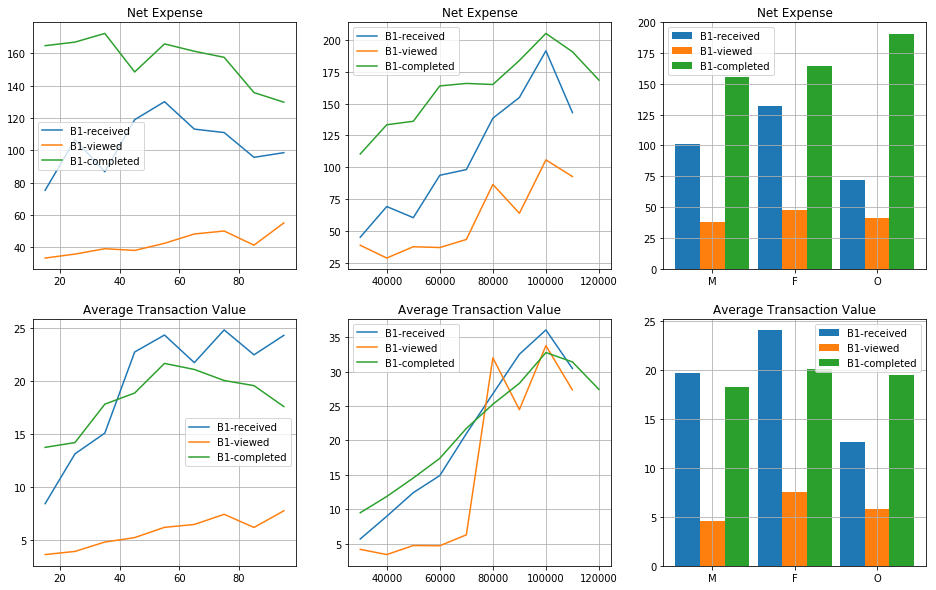

In [64]:
plot_offer_expense_by(customers, 'B1')

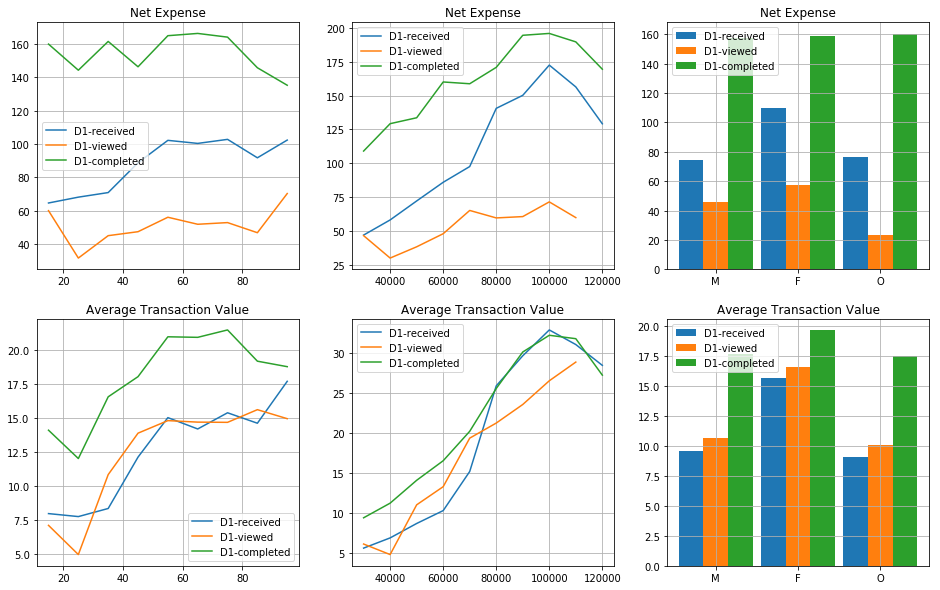

In [65]:
plot_offer_expense_by(customers, 'D1')

# Recommendation System - using demographics

Here, we analyze the popularity of different offers among customers based on their net expenses, and filters the results based on specific customer demographics like gender, age, and income.

The get_net_expense() function calculates the net expense of customers who viewed or completed a specific offer, and have a minimum number of total transactions. The get_most_popular_offers() function sorts the offers based on their net expenses, and returns the top n offers along with their corresponding net expenses.

The get_most_popular_offers_filtered() function filters the customers based on their demographic information, and returns the most popular offers among the filtered customers.

The code then uses the get_offer_stat_by() and get_average_expense_by() functions to calculate the net expense and average transaction value of the 'D1' offer for different gender groups. Finally, the code generates two bar plots to visualize the net expenses and average transaction values of the 'D1' offer for different gender groups.

In [ ]:
def get_most_popular_offers_filtered(customers, n_top=2, q=0.5, income=None,
                                     age=None, gender=None):
    flag = (customers.valid == 1)
    if income:
        income_gr = round_income(income)
        if income_gr > 0:
            flag = flag & (customers.income_group == income_gr)
    if age:
        age_gr = round_age(age)
        if age_gr > 0:
            flag = flag & (customers.age_group == age_gr)
    if gender:
        flag = flag & (customers.gender == gender)
    return get_most_popular_offers(customers[flag], n_top, q)

In [63]:
offers_filtered = get_most_popular_offers_filtered(customers, n_top=10, income=95000)
print("Order of most popular orders: ", offers_filtered[0])
print("Net expense for each offer", offers_filtered[1])

Order of most popular orders:  ['B3', 'D3', 'D1', 'D4', 'B1', 'D2', 'B4', 'B2', 'I1', 'I2']
Net expense for each offer {'B3': 204.325, 'D3': 204.22000000000003, 'D1': 204.21, 'D4': 197.41000000000003, 'B1': 196.62, 'D2': 195.17, 'B4': 187.98, 'B2': 186.17000000000002, 'I1': 185.275, 'I2': 180.41500000000002}


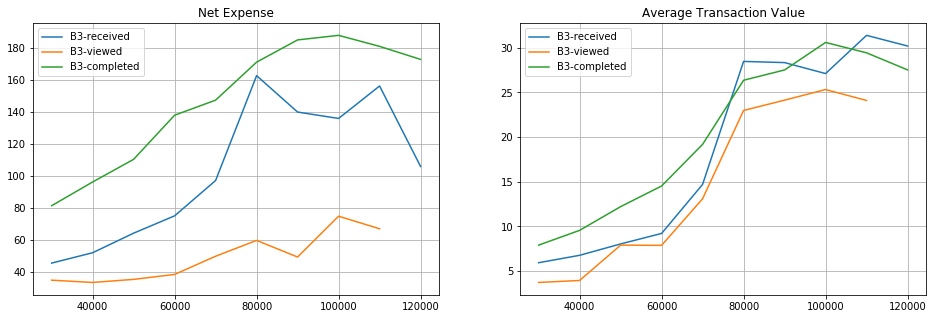

In [67]:
offer = 'B3'
rcv_by, vwd_by, cpd_by = get_offer_stat_by(customers, 'net_expense', offer, 'income_group', aggr='mean')
rcv_avg_by, vwd_avg_by, cpd_avg_by = get_average_expense_by(customers, offer, 'income_group')

plt.figure(figsize=(16,5))

plt.subplot(121)
plt.plot(rcv_by, label='{}-received'.format(offer))
plt.plot(vwd_by, label='{}-viewed'.format(offer))
plt.plot(cpd_by,  label='{}-completed'.format(offer))
plt.legend(loc='best')
plt.title('Net Expense');
plt.grid();

plt.subplot(122)
plt.plot(rcv_avg_by, label='{}-received'.format(offer))
plt.plot(vwd_avg_by, label='{}-viewed'.format(offer))
plt.plot(cpd_avg_by, label='{}-completed'.format(offer))
plt.legend(loc='best')
plt.title('Average Transaction Value');
plt.grid();

### Result : The completed offers customers data for the recommended offer (B3) provides both the maximum net expense and average transaction value

In [69]:
offers = get_most_popular_offers_filtered(customers, n_top=10, gender='M')
print("Order of most popular orders, filtered by gender = Male: ", offers[0])
print("Net expense for each offer", offers[1])

['B2', 'D1', 'B1', 'D4', 'B3', 'B4', 'D3', 'I1', 'D2', 'I2']
{'B2': 138.835, 'D1': 136.89000000000001, 'B1': 136.45, 'D4': 126.485, 'B3': 119.77000000000001, 'B4': 115.60999999999999, 'D3': 110.4, 'I1': 109.575, 'D2': 101.88, 'I2': 71.00500000000001}


In [71]:
offers = get_most_popular_offers_filtered(customers, n_top=10, gender='F')
print("Order of most popular orders, filtered by gender = Female: ", offers[0])
print("Net expense for each offer", offers[1])

Order of most popular orders, filtered by gender = Male:  ['D1', 'D4', 'B1', 'D3', 'B2', 'B4', 'D2', 'I1', 'B3', 'I2']
Net expense for each offer {'D1': 154.83, 'D4': 154.62, 'B1': 153.745, 'D3': 153.59000000000003, 'B2': 150.37, 'B4': 145.21999999999997, 'D2': 145.03000000000003, 'I1': 142.23, 'B3': 141.60999999999999, 'I2': 132.5}


In [73]:
offers = get_most_popular_offers_filtered(customers, n_top=10, gender='O')
print("Order of most popular orders, filtered by gender = Other: ", offers[0])
print("Net expense for each offer", offers[1])

Order of most popular orders, filtered by gender = Other:  ['B3', 'D4', 'B1', 'D3', 'D1', 'D2', 'B2', 'I1', 'B4', 'I2']
Net expense for each offer {'B3': 162.78000000000003, 'D4': 162.78000000000003, 'B1': 160.93, 'D3': 160.42000000000002, 'D1': 143.25, 'D2': 142.73999999999998, 'B2': 138.84, 'I1': 129.65499999999997, 'B4': 122.44, 'I2': 88.63000000000001}


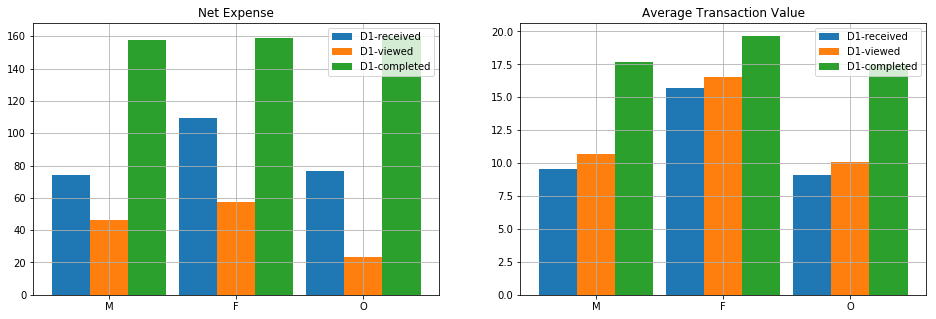

In [74]:
rcv_gender, vwd_gender, cpd_gender = get_offer_stat_by(customers, 'net_expense', 'D1', 'gender', aggr='mean')
rcv_avg_gender, vwd_avg_gender, cpd_avg_gender = get_average_expense_by(customers, 'D1', 'gender')

plt.figure(figsize=(16,5))

plt.subplot(121)
index = np.array([0,1,2])
bar_width = 0.3

plt.bar(index, rcv_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-received')
plt.bar(index + bar_width, vwd_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-viewed')
plt.bar(index + 2*bar_width, cpd_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-completed')
plt.grid();
plt.legend(loc='best');
plt.title('Net Expense');
plt.xticks(index + bar_width, ('M', 'F', 'O'));

plt.subplot(122)

index = np.array([0,1,2])
bar_width = 0.3
plt.bar(index, rcv_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-received')
plt.bar(index + bar_width, vwd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-viewed')
plt.bar(index + 2*bar_width, cpd_avg_gender.reindex(['M', 'F', 'O']), bar_width, label='D1-completed')
plt.grid();
plt.legend(loc='best');
plt.title('Average Transaction Value');
plt.xticks(index + bar_width, ('M', 'F', 'O'));


### Result : The above plots show that women were more inclined to go through with the D1 offers (discount). Hence, such discount promotions should be targeted more towards women.

# Conclusion

The project uses customer transaction data to determine the most popular offers and their net expenses, and can filter the results based on customer demographics such as income, age, and gender.

The system uses various functions to process the data, including get_net_expense to calculate the net expense of an offer, get_most_popular_offers to determine the most popular offers based on net expense, and get_most_popular_offers_filtered to filter the results based on customer demographics. The system also includes functions to plot the data, such as plot_offer_expense_by and get_average_expense_by.

Overall, the project aims to provide recommendations for the most popular offers based on customer transaction data, and can be filtered based on customer demographics.